In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%reload_ext autoreload

In [25]:
import warnings
warnings.filterwarnings("ignore")


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from sklearn.utils import class_weight
import graphviz
import pydot
import sys

In [27]:
sys.path.insert(0, '..')
from data_wrangling import create_new_folder
from cnn_model import *
from resnet50 import *
from modeling_results import *

In [28]:
train = r'../train_images'
val = r'../val_images'
test = r'../test_images'

## INITIALIZE GENERATORS FOR TRAIN, VALIDATION, AND TEST SETS

In [29]:
image_size = (200, 200) #(height, width)
batch_size = 32
num_classes = len(os.listdir(train))

train_gen = ImageDataGenerator(rescale=1./255, 
                               shear_range=0.1,
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

val_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(directory=train, 
                                              target_size=image_size,
                                              color_mode='rgb',
                                              class_mode='categorical', 
                                              batch_size = batch_size,
                                              seed=42)

validation_generator = val_gen.flow_from_directory(directory=val, 
                                                   target_size=image_size,
                                                   color_mode='rgb',
                                                   class_mode='categorical', 
                                                   batch_size = batch_size,
                                                   seed=42)

test_generator = test_gen.flow_from_directory(directory=test, 
                                              target_size=image_size,
                                              color_mode='rgb',
                                              class_mode='categorical', 
                                              batch_size = 1,
                                              shuffle = False,
                                                   seed=42)

Found 6454 images belonging to 6 classes.
Found 207 images belonging to 6 classes.
Found 231 images belonging to 6 classes.


#### PREVIEW TRAIN DATASET

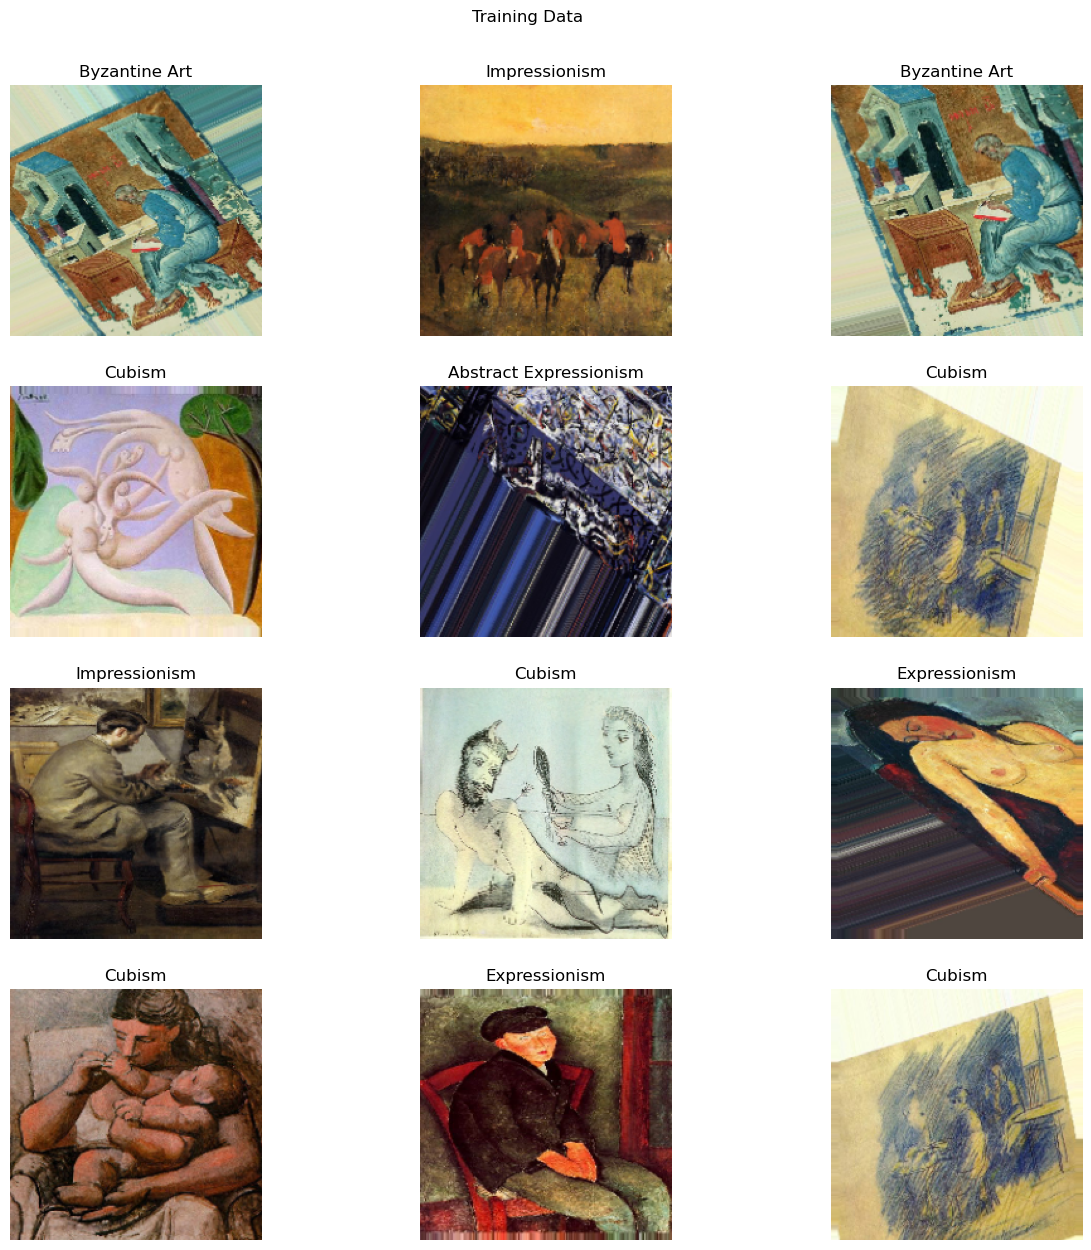

In [30]:
plt.figure(figsize=(15,15))

x, y = train_generator.__getitem__(10) #returns batch of size 32; arg is a random sequence of the batch
x = x.reshape((1,)+x.shape)
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
y = [np.argmax(i) for i in y]
y = [labels[k] for k in y]

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    image = x[0][i]
    plt.imshow(image)
    plt.title(y[i])
    plt.axis("off")
plt.suptitle('Training Data', y=0.93)
plt.show()

In [31]:
modelpath = r'../models'
epochs = 25

# CNN MODEL

In [51]:
model = cnn_model(input_shape=image_size + (3,), num_classes=num_classes)
# keras.utils.plot_model(model, to_file='../graphs/cnn_model.jpg', show_shapes=True, dpi=80)

In [52]:
model.load_weights('../models/model_cnn_checkpoint_25.h5')

In [12]:
callbacks = [keras.callbacks.ModelCheckpoint(os.path.join(modelpath,f'model_cnn_checkpoint_{epochs}.h5')),]

model.compile(optimizer='adam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                 )

cnn_history = model.fit(train_generator,
              epochs=epochs,
              callbacks=callbacks,
              validation_data=validation_generator,)

Epoch 1/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5797 - loss: 1.1504

202/202 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.5806 - loss: 1.1483 - val_accuracy: 0.5121 - val_loss: 1.5952
Epoch 2/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8853 - loss: 0.3774

202/202 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.8853 - loss: 0.3773 - val_accuracy: 0.6522 - val_loss: 1.0148
Epoch 3/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9067 - loss: 0.3039

202/202 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.9067 - loss: 0.3039 - val_accuracy: 0.6329 - val_loss: 1.0060
Epoch 4/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9173 - loss: 0.2793

202/202 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9173 - loss: 0.2793 - val_accuracy: 0.7053 - val_loss: 0.8362
Epoch 5/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9251 - loss: 0.2575

202/202 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9251 - loss: 0.2575 - val_accuracy: 0.7488 - val_loss: 0.8829
Epoch 6/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9275 - loss: 0.2414

202/202 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9275 - loss: 0.2414 - val_accuracy: 0.7391 - val_loss: 0.7141
Epoch 7/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9263 - loss: 0.2410

202/202 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9263 - loss: 0.2410 - val_accuracy: 0.7633 - val_loss: 0.6993
Epoch 8/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9413 - loss: 0.1945

202/202 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9412 - loss: 0.1946 - val_accuracy: 0.7440 - val_loss: 0.8052
Epoch 9/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9340 - loss: 0.2020

202/202 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9340 - loss: 0.2020 - val_accuracy: 0.6667 - val_loss: 1.0108
Epoch 10/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9300 - loss: 0.2169

202/202 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.9300 - loss: 0.2169 - val_accuracy: 0.7150 - val_loss: 1.0230
Epoch 11/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9324 - loss: 0.2026

202/202 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9324 - loss: 0.2026 - val_accuracy: 0.7391 - val_loss: 0.8724
Epoch 12/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9426 - loss: 0.1797

202/202 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.9426 - loss: 0.1797 - val_accuracy: 0.7005 - val_loss: 0.8821
Epoch 13/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9381 - loss: 0.1863

202/202 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.9381 - loss: 0.1863 - val_accuracy: 0.7585 - val_loss: 0.7692
Epoch 14/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9454 - loss: 0.1845

202/202 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.9454 - loss: 0.1846 - val_accuracy: 0.7971 - val_loss: 0.8190
Epoch 15/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9388 - loss: 0.1890

202/202 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9388 - loss: 0.1891 - val_accuracy: 0.7874 - val_loss: 0.7734
Epoch 16/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9424 - loss: 0.1727

202/202 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.9424 - loss: 0.1728 - val_accuracy: 0.7826 - val_loss: 0.7174
Epoch 17/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9444 - loss: 0.1664

202/202 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.9444 - loss: 0.1664 - val_accuracy: 0.6763 - val_loss: 0.9190
Epoch 18/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9480 - loss: 0.1529

202/202 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9480 - loss: 0.1530 - val_accuracy: 0.6715 - val_loss: 0.8494
Epoch 19/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9458 - loss: 0.1605

202/202 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9458 - loss: 0.1605 - val_accuracy: 0.7681 - val_loss: 0.7283
Epoch 20/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9454 - loss: 0.1550

202/202 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9455 - loss: 0.1549 - val_accuracy: 0.7488 - val_loss: 0.7404
Epoch 21/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9518 - loss: 0.1502

202/202 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9518 - loss: 0.1503 - val_accuracy: 0.7101 - val_loss: 0.8043
Epoch 22/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9520 - loss: 0.1487

202/202 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.9520 - loss: 0.1487 - val_accuracy: 0.7005 - val_loss: 0.8543
Epoch 23/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9493 - loss: 0.1462

202/202 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.9493 - loss: 0.1464 - val_accuracy: 0.7343 - val_loss: 0.9020
Epoch 24/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9489 - loss: 0.1634

202/202 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.9489 - loss: 0.1633 - val_accuracy: 0.7923 - val_loss: 0.9534
Epoch 25/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9518 - loss: 0.1411

202/202 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.9518 - loss: 0.1411 - val_accuracy: 0.7681 - val_loss: 0.7624


In [13]:
print(model.summary())

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 200, 200, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_multi6 (Dense)                    │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,002,452 (118.26 MB)

 Trainable params: 10,334,150 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,668,302 (78.84 MB)

None


#### SAVE METRICS AND PREDICTION RESULTS

In [15]:
#Save train/val accuracy and train/val loss
cnn_hist = pd.DataFrame(cnn_history.history)
cnn_hist.to_csv(f'../results/cnn_hist_{epochs}epochs.csv', index=False)

In [16]:
model.evaluate(validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7997 - loss: 0.6916


[0.762357234954834, 0.7681159377098083]

231/231 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step


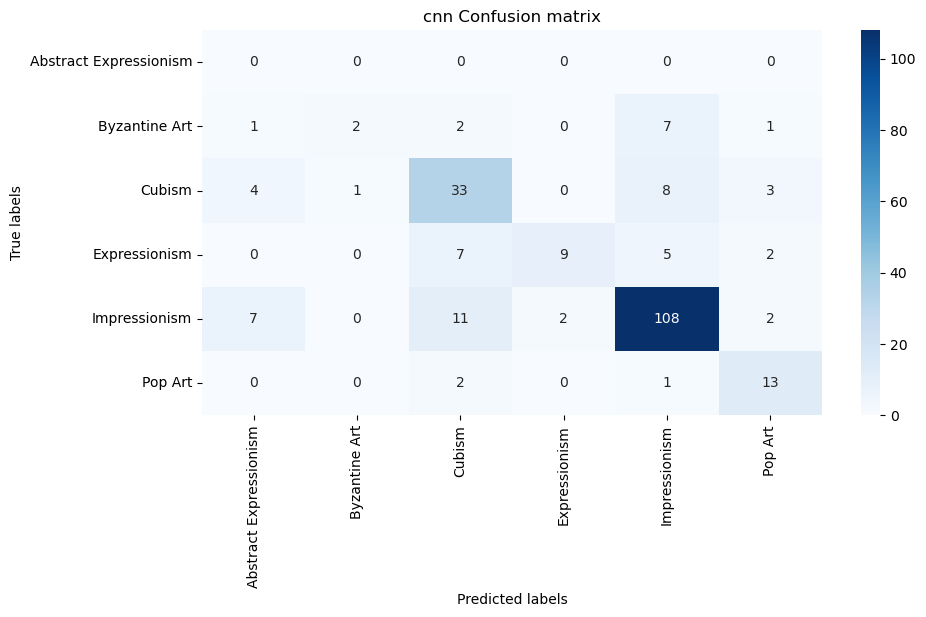

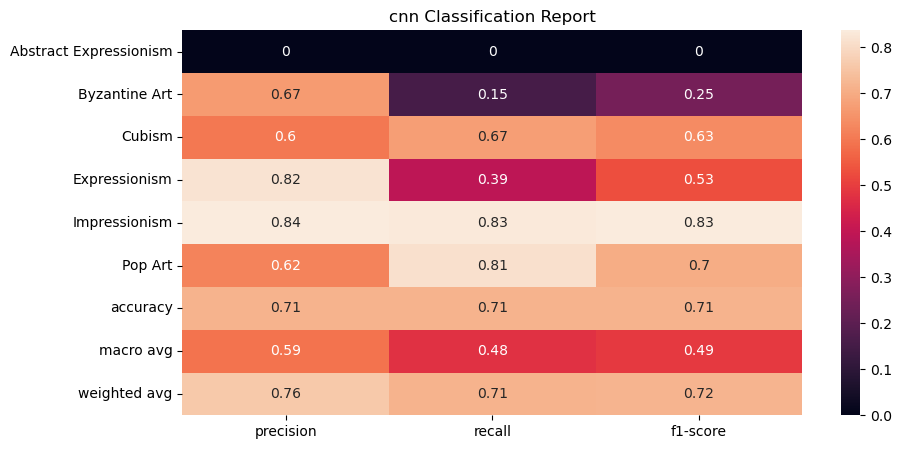

In [53]:
test_generator.reset()
pred = model.predict(test_generator, verbose=1)
results = pred_results(train_generator, test_generator, pred, 'cnn_pred_results')
acc_cnn = metric_eval(test_generator, pred, results, labels=os.listdir(train), title='cnn')    

# WEIGHTED CNN MODEL

In [10]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_generator.labels), y=train_generator.labels)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}

In [54]:
wmodel = cnn_model(input_shape=image_size + (3,), num_classes=num_classes)

In [55]:
wmodel.load_weights('../models/model_cnnweighted_checkpoint_25.h5')

In [12]:
callbacks = [keras.callbacks.ModelCheckpoint(os.path.join(modelpath,f'model_cnnweighted_checkpoint_{epochs}.h5')),]

wmodel.compile(optimizer='adam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                 )

weight_cnn_history = wmodel.fit(train_generator, 
                                epochs=epochs, 
                                callbacks=callbacks, 
                                validation_data=validation_generator, 
                                class_weight=class_weights)

Epoch 1/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6146 - loss: 1.1070

202/202 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.6153 - loss: 1.1051 - val_accuracy: 0.6473 - val_loss: 1.0303
Epoch 2/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8826 - loss: 0.3830

202/202 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.8826 - loss: 0.3829 - val_accuracy: 0.6473 - val_loss: 1.0087
Epoch 3/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8974 - loss: 0.3137

202/202 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.8974 - loss: 0.3138 - val_accuracy: 0.6860 - val_loss: 0.9756
Epoch 4/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9231 - loss: 0.2645

202/202 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9231 - loss: 0.2645 - val_accuracy: 0.7005 - val_loss: 0.8776
Epoch 5/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9179 - loss: 0.2613

202/202 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9179 - loss: 0.2613 - val_accuracy: 0.7246 - val_loss: 0.8638
Epoch 6/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9264 - loss: 0.2348

202/202 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.9264 - loss: 0.2349 - val_accuracy: 0.7150 - val_loss: 0.9330
Epoch 7/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9249 - loss: 0.2447

202/202 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9249 - loss: 0.2448 - val_accuracy: 0.7150 - val_loss: 0.8379
Epoch 8/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9267 - loss: 0.2358

202/202 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9267 - loss: 0.2358 - val_accuracy: 0.7198 - val_loss: 0.8897
Epoch 9/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9249 - loss: 0.2300

202/202 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.9249 - loss: 0.2300 - val_accuracy: 0.7874 - val_loss: 0.6062
Epoch 10/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9380 - loss: 0.2037

202/202 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9379 - loss: 0.2037 - val_accuracy: 0.7246 - val_loss: 0.7029
Epoch 11/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9285 - loss: 0.2099

202/202 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.9285 - loss: 0.2100 - val_accuracy: 0.7246 - val_loss: 0.8136
Epoch 12/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9280 - loss: 0.2137

202/202 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.9280 - loss: 0.2136 - val_accuracy: 0.7440 - val_loss: 0.7624
Epoch 13/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9374 - loss: 0.1925

202/202 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.9374 - loss: 0.1926 - val_accuracy: 0.7005 - val_loss: 1.0182
Epoch 14/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9379 - loss: 0.1982

202/202 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9379 - loss: 0.1983 - val_accuracy: 0.5990 - val_loss: 1.0810
Epoch 15/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9355 - loss: 0.2030

202/202 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.9354 - loss: 0.2030 - val_accuracy: 0.7295 - val_loss: 0.8015
Epoch 16/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9393 - loss: 0.1848

202/202 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.9393 - loss: 0.1848 - val_accuracy: 0.6957 - val_loss: 1.0550
Epoch 17/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9386 - loss: 0.1861

202/202 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.9385 - loss: 0.1862 - val_accuracy: 0.7778 - val_loss: 0.6342
Epoch 18/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9486 - loss: 0.1642

202/202 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.9486 - loss: 0.1643 - val_accuracy: 0.7343 - val_loss: 0.8009
Epoch 19/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9464 - loss: 0.1614

202/202 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.9463 - loss: 0.1615 - val_accuracy: 0.7633 - val_loss: 0.6841
Epoch 20/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9416 - loss: 0.1820

202/202 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.9415 - loss: 0.1820 - val_accuracy: 0.7681 - val_loss: 0.6509
Epoch 21/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9505 - loss: 0.1464

202/202 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.9505 - loss: 0.1465 - val_accuracy: 0.7198 - val_loss: 0.8393
Epoch 22/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9475 - loss: 0.1688

202/202 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.9475 - loss: 0.1688 - val_accuracy: 0.8019 - val_loss: 0.5983
Epoch 23/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9560 - loss: 0.1323

202/202 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9560 - loss: 0.1324 - val_accuracy: 0.7536 - val_loss: 0.6969
Epoch 24/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9526 - loss: 0.1546

202/202 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.9526 - loss: 0.1546 - val_accuracy: 0.7778 - val_loss: 0.6627
Epoch 25/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9539 - loss: 0.1428

202/202 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.9539 - loss: 0.1429 - val_accuracy: 0.6957 - val_loss: 0.9943


In [13]:
#Save train/val accuracy and train/val loss
weight_cnn_hist = pd.DataFrame(weight_cnn_history.history)
weight_cnn_hist.to_csv(f'../results/weight_cnn_hist_{epochs}epochs.csv', index=False)

In [14]:
wmodel.evaluate(validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 959ms/step - accuracy: 0.6900 - loss: 0.9374


[0.994323194026947, 0.695652186870575]

#### SAVE METRICS AND PREDICTION RESULTS

231/231 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step


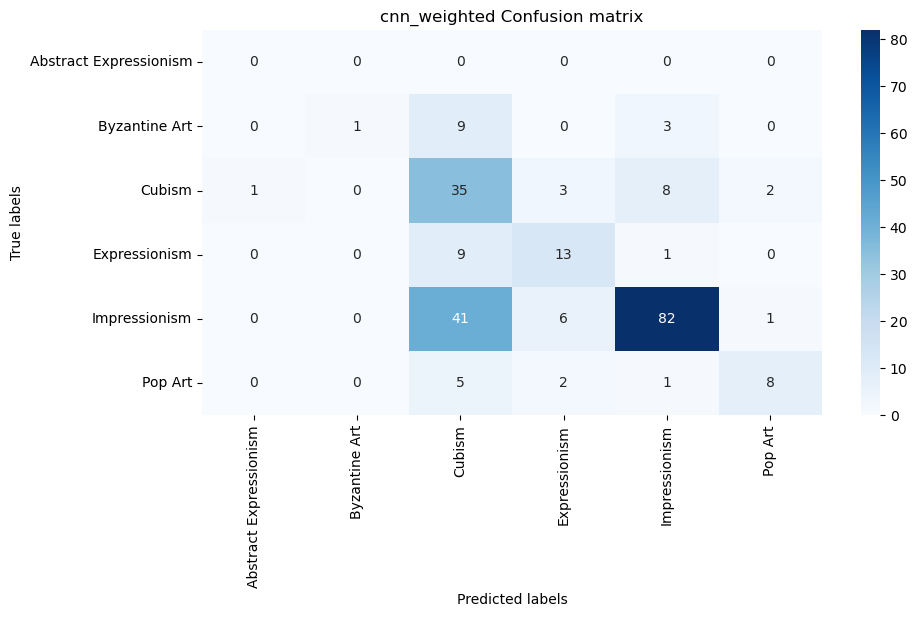

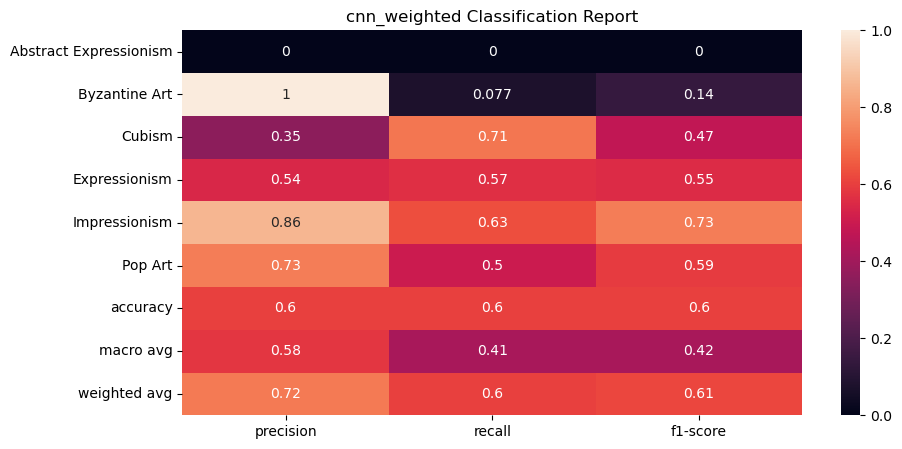

In [56]:
test_generator.reset()
pred = wmodel.predict(test_generator, verbose=1)
results = pred_results(train_generator, test_generator, pred, 'cnn_model_pred_weighted_results')
acc_cnnw = metric_eval(test_generator, pred, results, labels=os.listdir(train), title='cnn_weighted')  

# RESNET50 MODEL

In [57]:
resnet50model = resnet50_model(input_shape=image_size+(3,), num_classes=num_classes)
# keras.utils.plot_model(resnet50model, to_file='../graphs/resnet50_model.jpg', show_shapes=True, dpi=80)

In [58]:
resnet50model.load_weights('../models/model_resnet50_checkpoint_25.h5')

In [18]:
callbacks = [keras.callbacks.ModelCheckpoint(os.path.join(modelpath,f'model_resnet50_checkpoint_{epochs}.h5')),]

resnet50model.compile(optimizer='adam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                 )

r50_history = resnet50model.fit(train_generator,
                                  epochs=epochs,
                                  callbacks=callbacks,
                                  validation_data=validation_generator,
                                  batch_size=batch_size)

Epoch 1/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5915 - loss: 2.8571

202/202 ━━━━━━━━━━━━━━━━━━━━ 986s 4s/step - accuracy: 0.5922 - loss: 2.8502 - val_accuracy: 0.6135 - val_loss: 1.5398
Epoch 2/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8735 - loss: 0.4812

202/202 ━━━━━━━━━━━━━━━━━━━━ 884s 4s/step - accuracy: 0.8735 - loss: 0.4808 - val_accuracy: 0.6473 - val_loss: 1.1301
Epoch 3/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8867 - loss: 0.4001

202/202 ━━━━━━━━━━━━━━━━━━━━ 901s 4s/step - accuracy: 0.8867 - loss: 0.4000 - val_accuracy: 0.1498 - val_loss: 10.7066
Epoch 4/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9044 - loss: 0.3553

202/202 ━━━━━━━━━━━━━━━━━━━━ 880s 4s/step - accuracy: 0.9044 - loss: 0.3555 - val_accuracy: 0.5314 - val_loss: 1.6662
Epoch 5/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9101 - loss: 0.3749

202/202 ━━━━━━━━━━━━━━━━━━━━ 918s 4s/step - accuracy: 0.9101 - loss: 0.3749 - val_accuracy: 0.6425 - val_loss: 7.0086
Epoch 6/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9095 - loss: 0.2733

202/202 ━━━━━━━━━━━━━━━━━━━━ 947s 4s/step - accuracy: 0.9095 - loss: 0.2733 - val_accuracy: 0.6570 - val_loss: 0.9856
Epoch 7/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9234 - loss: 0.2374

202/202 ━━━━━━━━━━━━━━━━━━━━ 879s 4s/step - accuracy: 0.9234 - loss: 0.2375 - val_accuracy: 0.4300 - val_loss: 3.2268
Epoch 8/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9085 - loss: 0.4217

202/202 ━━━━━━━━━━━━━━━━━━━━ 912s 5s/step - accuracy: 0.9085 - loss: 0.4213 - val_accuracy: 0.5314 - val_loss: 1.5837
Epoch 9/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9300 - loss: 0.2261

202/202 ━━━━━━━━━━━━━━━━━━━━ 893s 4s/step - accuracy: 0.9300 - loss: 0.2262 - val_accuracy: 0.6473 - val_loss: 1.1196
Epoch 10/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9281 - loss: 0.2350

202/202 ━━━━━━━━━━━━━━━━━━━━ 868s 4s/step - accuracy: 0.9280 - loss: 0.2355 - val_accuracy: 0.0918 - val_loss: 317.5774
Epoch 11/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8969 - loss: 0.4022

202/202 ━━━━━━━━━━━━━━━━━━━━ 883s 4s/step - accuracy: 0.8969 - loss: 0.4020 - val_accuracy: 0.5990 - val_loss: 1.2258
Epoch 12/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9215 - loss: 0.2637

202/202 ━━━━━━━━━━━━━━━━━━━━ 1037s 5s/step - accuracy: 0.9215 - loss: 0.2637 - val_accuracy: 0.3527 - val_loss: 2.2865
Epoch 13/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9311 - loss: 0.2123

202/202 ━━━━━━━━━━━━━━━━━━━━ 869s 4s/step - accuracy: 0.9311 - loss: 0.2123 - val_accuracy: 0.7198 - val_loss: 0.8450
Epoch 14/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9301 - loss: 0.2071

202/202 ━━━━━━━━━━━━━━━━━━━━ 946s 4s/step - accuracy: 0.9301 - loss: 0.2072 - val_accuracy: 0.7246 - val_loss: 0.7755
Epoch 15/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9402 - loss: 0.1863

202/202 ━━━━━━━━━━━━━━━━━━━━ 894s 4s/step - accuracy: 0.9402 - loss: 0.1865 - val_accuracy: 0.6715 - val_loss: 0.8502
Epoch 16/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9450 - loss: 0.1892

202/202 ━━━━━━━━━━━━━━━━━━━━ 900s 4s/step - accuracy: 0.9449 - loss: 0.1898 - val_accuracy: 0.1353 - val_loss: 792.3865
Epoch 17/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8985 - loss: 0.4432

202/202 ━━━━━━━━━━━━━━━━━━━━ 834s 4s/step - accuracy: 0.8986 - loss: 0.4428 - val_accuracy: 0.6860 - val_loss: 0.8665
Epoch 18/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9221 - loss: 0.2343

202/202 ━━━━━━━━━━━━━━━━━━━━ 939s 5s/step - accuracy: 0.9221 - loss: 0.2343 - val_accuracy: 0.6908 - val_loss: 0.7992
Epoch 19/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9305 - loss: 0.2252

202/202 ━━━━━━━━━━━━━━━━━━━━ 661s 3s/step - accuracy: 0.9305 - loss: 0.2254 - val_accuracy: 0.0918 - val_loss: 142.4165
Epoch 20/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9309 - loss: 0.2481

202/202 ━━━━━━━━━━━━━━━━━━━━ 630s 3s/step - accuracy: 0.9309 - loss: 0.2482 - val_accuracy: 0.5556 - val_loss: 1.1503
Epoch 21/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9233 - loss: 0.2182

202/202 ━━━━━━━━━━━━━━━━━━━━ 635s 3s/step - accuracy: 0.9233 - loss: 0.2181 - val_accuracy: 0.7778 - val_loss: 0.6436
Epoch 22/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9341 - loss: 0.2006

202/202 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.9341 - loss: 0.2006 - val_accuracy: 0.6715 - val_loss: 0.9420
Epoch 23/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9430 - loss: 0.1656

202/202 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.9430 - loss: 0.1657 - val_accuracy: 0.7440 - val_loss: 0.6622
Epoch 24/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9413 - loss: 0.1536

202/202 ━━━━━━━━━━━━━━━━━━━━ 629s 3s/step - accuracy: 0.9413 - loss: 0.1537 - val_accuracy: 0.7681 - val_loss: 0.6067
Epoch 25/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9384 - loss: 0.2180

202/202 ━━━━━━━━━━━━━━━━━━━━ 710s 4s/step - accuracy: 0.9384 - loss: 0.2178 - val_accuracy: 0.7681 - val_loss: 0.6757


In [19]:
print(resnet50model.summary())

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 206, 206, 3)       │               0 │ input_layer_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1 (Conv2D)                │ (None, 100, 100, 64)      │           9,472 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_conv1 (BatchNormalization) │ (None, 100, 100, 64)      │             256 │ conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_4 (Activation)     │ (None, 100, 100, 64)      │               0 │ bn_conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 49, 49, 64)        │               0 │ activation_4[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ res2a2a (Conv2D)              │ (None, 25, 25, 64)        │           4,160 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn2a2a (BatchNormalization)   │ (None, 25, 25, 64)        │             256 │ res2a2a[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_5 (Activation)     │ (None, 25, 25, 64)        │               0 │ bn2a2a[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ res2a2b (Conv2D)              │ (None, 25, 25, 64)        │          36,928 │ activation_5[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn2a2b (BatchNormalization)   │ (None, 25, 25, 64)        │             256 │ res2a2b[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_6 (Activation)     │ (None, 25, 25, 64)        │               0 │ bn2a2b[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ res2a2c (Conv2D)              │ (None, 25, 25, 256)       │          16,640 │ activation_6[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ res2a1 (Conv2D)               │ (None, 25, 25, 256)       │          16,640 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn2a2c (BatchNormalization)   │ (None, 25, 25, 256)       │           1,024 │ res2a2c[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn2a1 (BatchNormalization)    │ (None, 25, 25, 256)       │           1,024 │ res2a1[0][0]               │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 70,804,372 (270.10 MB)

 Trainable params: 23,583,750 (89.96 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,167,502 (179.93 MB)

None


In [20]:
#Save train/val accuracy and train/val loss
r50_hist = pd.DataFrame(r50_history.history)
r50_hist.to_csv(f'../results/r50_hist_{epochs}epochs.csv', index=False)

In [21]:
resnet50model.evaluate(validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7330 - loss: 0.7140


[0.6756986975669861, 0.7681159377098083]

#### SAVE METRICS AND PREDICTION RESULTS

231/231 ━━━━━━━━━━━━━━━━━━━━ 32s 125ms/step


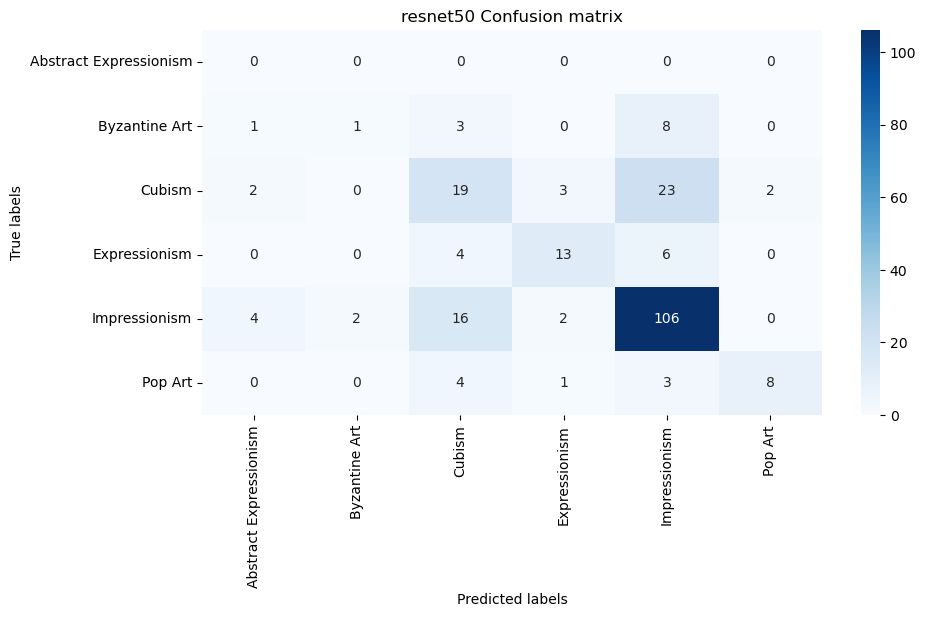

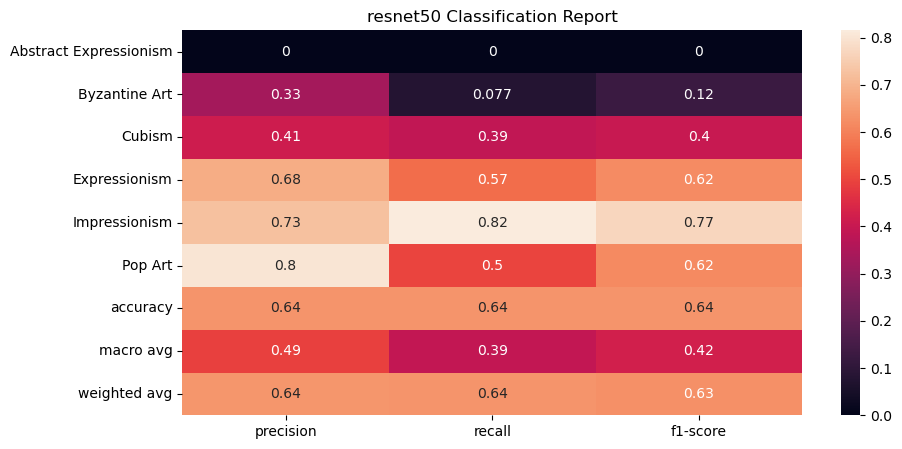

In [59]:
test_generator.reset()
rn50pred = resnet50model.predict(test_generator, verbose=1)
results = pred_results(train_generator, test_generator, rn50pred, 'resnet50_model_results')
acc_rn50 = metric_eval(test_generator, rn50pred, results, labels=os.listdir(train), title='resnet50')

# RESNET50 WEIGHTED MODEL

In [64]:
r50wmodel = resnet50_model(input_shape=image_size+(3,), num_classes=num_classes)

In [13]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(train_generator.labels), y=train_generator.labels)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}

In [65]:
r50wmodel.load_weights('../models/model_resnet50weighted_checkpoint_25.h5')

In [ ]:
#this uses class weights
callbacks = [keras.callbacks.ModelCheckpoint(os.path.join(modelpath,f'model_resnet50weighted_checkpoint_{epochs}.h5')),]

r50wmodel.compile(optimizer='adam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy']
                 )

r50weight_history = r50wmodel.fit(train_generator,
                  epochs=epochs,
                  callbacks=callbacks,
                  validation_data=validation_generator,
                  class_weight=class_weights)

In [15]:
#Save train/val accuracy and train/val loss
r50w_hist = pd.DataFrame(r50weight_history.history)
r50w_hist.to_csv(f'../results/r50_weight_hist_{epochs}epochs.csv', index=False)

In [16]:
r50wmodel.evaluate(validation_generator, verbose=1) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7619 - loss: 0.6762


[0.7258484959602356, 0.739130437374115]

#### SAVE METRICS AND PREDICTION RESULTS

231/231 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step


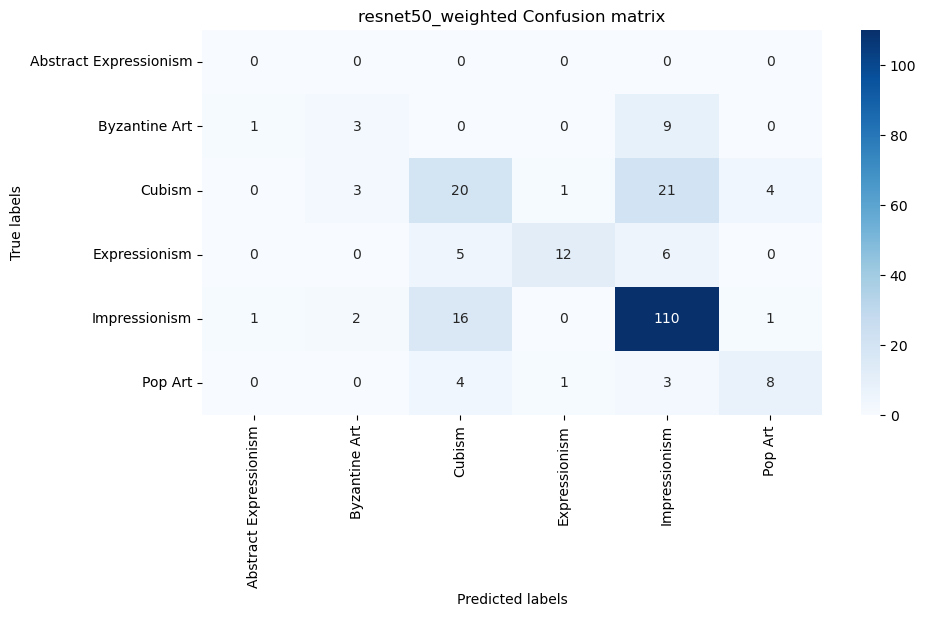

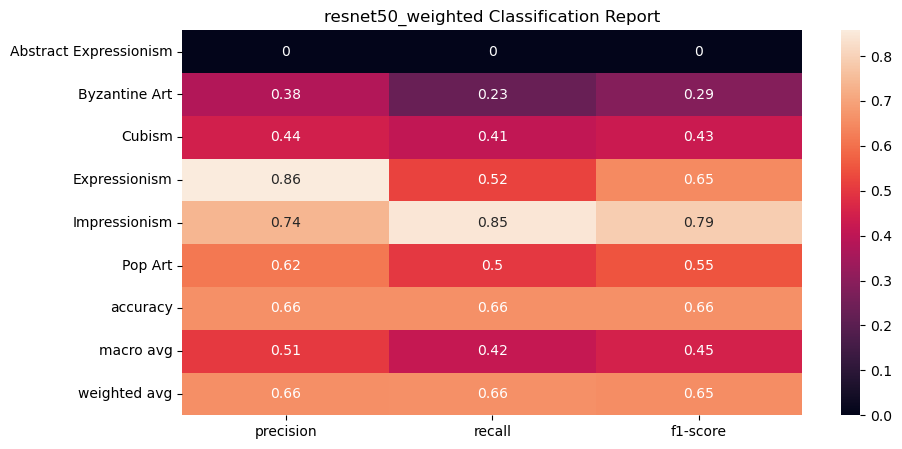

In [66]:
test_generator.reset()
r50wpred = r50wmodel.predict(test_generator, verbose=1)
results = pred_results(train_generator, test_generator, r50wpred, 'resnet50_model_weighted_results')
acc_rn50w = metric_eval(test_generator, r50wpred, results, labels=os.listdir(train), title='resnet50_weighted')


# TRANSFER LEARNING RESNET50 with ImageNet

In [10]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_size+(3,))

x = base_model.output
x = Flatten()(base_model.output) #last_output
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)                  

x = Dense (num_classes, activation='softmax')(x)           

transfer_model = Model(inputs=base_model.input, outputs=x)

In [60]:
transfer_model.load_weights('../models/r50_transfer_checkpoint_25.h5')

In [17]:
import h5py
with h5py.File(os.path.join('../models', 'r50_transfer_checkpoint_25.h5'), 'r') as f:
    print(list(f.keys()))


['model_weights', 'optimizer_weights']


We will continue to use the ADAM optimizer with a lower learning rate

In [18]:
transfer_model.compile(optimizer=Adam(learning_rate=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(os.path.join(modelpath,f'r50_transfer_checkpoint_{epochs}.h5')),]

history = transfer_model.fit(train_generator, 
                    initial_epoch=20,
                    epochs=epochs,
                    callbacks=callbacks, 
                    validation_data=validation_generator,
                    batch_size=batch_size)

Epoch 21/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9995 - loss: 0.0033 

202/202 ━━━━━━━━━━━━━━━━━━━━ 2432s 12s/step - accuracy: 0.9995 - loss: 0.0033 - val_accuracy: 0.9662 - val_loss: 0.1077
Epoch 22/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9990 - loss: 0.0027 

202/202 ━━━━━━━━━━━━━━━━━━━━ 2389s 12s/step - accuracy: 0.9990 - loss: 0.0027 - val_accuracy: 0.9517 - val_loss: 0.2270
Epoch 23/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.9952 - loss: 0.0175 

202/202 ━━━━━━━━━━━━━━━━━━━━ 4351s 22s/step - accuracy: 0.9952 - loss: 0.0174 - val_accuracy: 0.9517 - val_loss: 0.2083
Epoch 24/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9990 - loss: 0.0037 

202/202 ━━━━━━━━━━━━━━━━━━━━ 2562s 12s/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9662 - val_loss: 0.1463
Epoch 25/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 335s/step - accuracy: 0.9990 - loss: 0.0056  

202/202 ━━━━━━━━━━━━━━━━━━━━ 67472s 335s/step - accuracy: 0.9990 - loss: 0.0056 - val_accuracy: 0.9662 - val_loss: 0.1303


In [19]:
#Save train/val accuracy and train/val loss
r50_transfer_hist = pd.DataFrame(history.history)
r50_transfer_hist.to_csv(f'../results/r50_transfer_hist_{epochs}epochs.csv', index=False)

In [20]:
test_generator.reset()
r50tpred = transfer_model.predict(test_generator, verbose=1)
results = pred_results(train_generator, test_generator, r50tpred, 'r50transfer_model_results')

231/231 ━━━━━━━━━━━━━━━━━━━━ 55s 218ms/step


In [39]:
transfer_model.evaluate(validation_generator, verbose=1) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9713 - loss: 0.1013


[0.1213507205247879, 0.966183602809906]

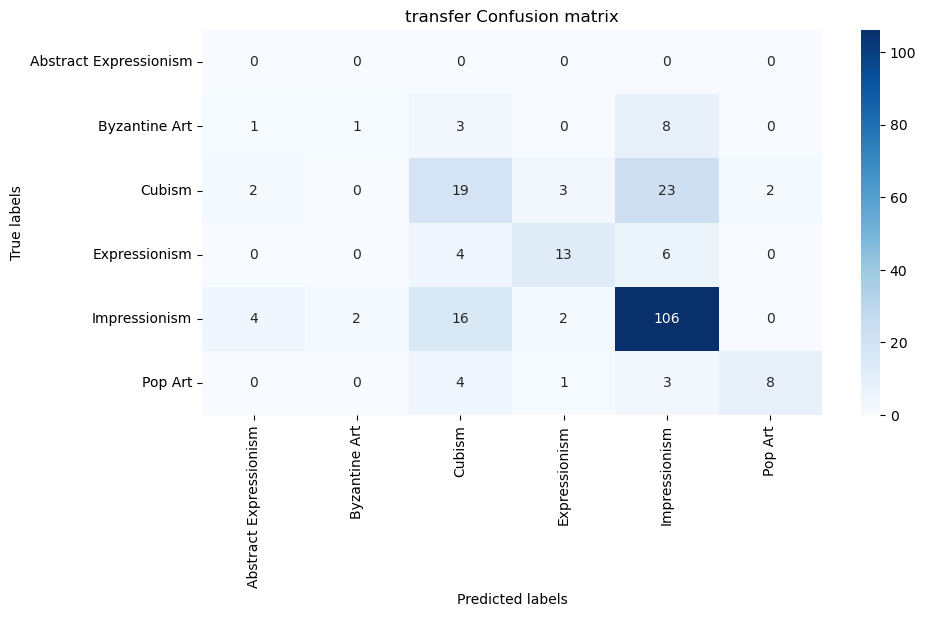

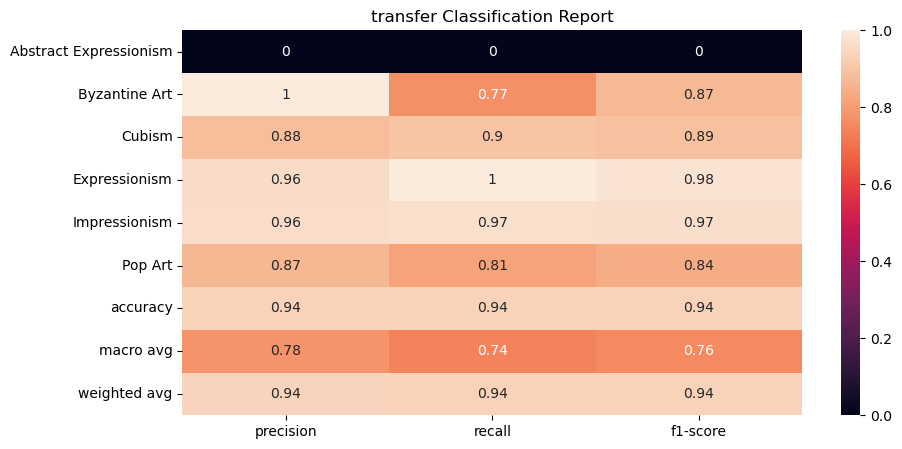

In [61]:
acc_rn50t = metric_eval(test_generator, r50tpred, results, labels=os.listdir(train), title='transfer')

# FINE TUNE PRE-TRAINED MODEL

In [32]:
## FINE TUNE AS NEEDED
# Visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name)

0 input_layer
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_

Let's fine tune the last 20% of the layers as an arbitrary starting point using a slower rate and a different optimizer to see whether fine tuning the last layers is better for the model.

In [33]:
finetune_last = transfer_model

In [35]:
#### TRAIN LAST RESNET BLOCK AND FREEZE STARTING LAYERS
for layer in finetune_last.layers[:143]:
    layer.trainable = False
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
finetune_last.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(os.path.join(modelpath,f'r50_finetune_last_checkpoint_{epochs}.h5')),]

history = finetune_last.fit(train_generator, 
                    epochs=epochs,
                    callbacks=callbacks, 
                    validation_data=validation_generator,
                    batch_size=batch_size)

Epoch 1/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9982 - loss: 0.0058

202/202 ━━━━━━━━━━━━━━━━━━━━ 885s 4s/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9662 - val_loss: 0.1288
Epoch 2/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9999 - loss: 8.9204e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1321s 7s/step - accuracy: 0.9999 - loss: 8.9183e-04 - val_accuracy: 0.9662 - val_loss: 0.1230
Epoch 3/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9996 - loss: 0.0018

202/202 ━━━━━━━━━━━━━━━━━━━━ 836s 4s/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9614 - val_loss: 0.1276
Epoch 4/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9997 - loss: 7.4886e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 813s 4s/step - accuracy: 0.9997 - loss: 7.4910e-04 - val_accuracy: 0.9710 - val_loss: 0.1169
Epoch 5/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9998 - loss: 6.8852e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1312s 7s/step - accuracy: 0.9998 - loss: 6.9307e-04 - val_accuracy: 0.9662 - val_loss: 0.1144
Epoch 6/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9995 - loss: 8.8400e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 791s 4s/step - accuracy: 0.9995 - loss: 8.8494e-04 - val_accuracy: 0.9662 - val_loss: 0.1109
Epoch 7/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9997 - loss: 8.2169e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 864s 4s/step - accuracy: 0.9997 - loss: 8.2355e-04 - val_accuracy: 0.9710 - val_loss: 0.1076
Epoch 8/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9998 - loss: 8.9951e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 846s 4s/step - accuracy: 0.9998 - loss: 9.0046e-04 - val_accuracy: 0.9662 - val_loss: 0.1126
Epoch 9/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9993 - loss: 0.0017

202/202 ━━━━━━━━━━━━━━━━━━━━ 848s 4s/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 0.9710 - val_loss: 0.1128
Epoch 10/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.9999 - loss: 6.0611e-04 

202/202 ━━━━━━━━━━━━━━━━━━━━ 4639s 23s/step - accuracy: 0.9999 - loss: 6.0833e-04 - val_accuracy: 0.9662 - val_loss: 0.1190
Epoch 11/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 3.2554e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 983s 5s/step - accuracy: 1.0000 - loss: 3.2605e-04 - val_accuracy: 0.9662 - val_loss: 0.1194
Epoch 12/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9999 - loss: 7.3792e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 985s 5s/step - accuracy: 0.9999 - loss: 7.3776e-04 - val_accuracy: 0.9662 - val_loss: 0.1171
Epoch 13/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9998 - loss: 9.1166e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 970s 5s/step - accuracy: 0.9998 - loss: 9.1090e-04 - val_accuracy: 0.9662 - val_loss: 0.1200
Epoch 14/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9996 - loss: 6.3819e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1022s 5s/step - accuracy: 0.9996 - loss: 6.3994e-04 - val_accuracy: 0.9710 - val_loss: 0.1147
Epoch 15/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 4.5826e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1001s 5s/step - accuracy: 1.0000 - loss: 4.5766e-04 - val_accuracy: 0.9662 - val_loss: 0.1166
Epoch 16/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9997 - loss: 7.0836e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 978s 5s/step - accuracy: 0.9997 - loss: 7.0842e-04 - val_accuracy: 0.9662 - val_loss: 0.1142
Epoch 17/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.9996 - loss: 0.0011 

202/202 ━━━━━━━━━━━━━━━━━━━━ 5345s 27s/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9662 - val_loss: 0.1203
Epoch 18/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9994 - loss: 0.0011

202/202 ━━━━━━━━━━━━━━━━━━━━ 1162s 6s/step - accuracy: 0.9994 - loss: 0.0011 - val_accuracy: 0.9614 - val_loss: 0.1239
Epoch 19/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9996 - loss: 7.0427e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1173s 6s/step - accuracy: 0.9996 - loss: 7.0494e-04 - val_accuracy: 0.9662 - val_loss: 0.1178
Epoch 20/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 62s/step - accuracy: 0.9997 - loss: 9.7528e-04  

202/202 ━━━━━━━━━━━━━━━━━━━━ 12524s 62s/step - accuracy: 0.9997 - loss: 9.7550e-04 - val_accuracy: 0.9662 - val_loss: 0.1176
Epoch 22/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9998 - loss: 7.0871e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1060s 5s/step - accuracy: 0.9998 - loss: 7.0736e-04 - val_accuracy: 0.9662 - val_loss: 0.1198
Epoch 23/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9999 - loss: 6.4053e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1003s 5s/step - accuracy: 0.9999 - loss: 6.4217e-04 - val_accuracy: 0.9662 - val_loss: 0.1190
Epoch 24/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9998 - loss: 4.8520e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1002s 5s/step - accuracy: 0.9998 - loss: 4.8471e-04 - val_accuracy: 0.9662 - val_loss: 0.1191
Epoch 25/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 1.0000 - loss: 2.3375e-04

202/202 ━━━━━━━━━━━━━━━━━━━━ 1003s 5s/step - accuracy: 1.0000 - loss: 2.3348e-04 - val_accuracy: 0.9662 - val_loss: 0.1214


In [36]:
#Save train/val accuracy and train/val loss
r50_finetune_last_hist = pd.DataFrame(history.history)
r50_finetune_last_hist.to_csv(f'../results/r50_finetune_last_hist_{epochs}epochs.csv', index=False)

In [37]:
finetune_last.evaluate(validation_generator, verbose=1) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9827 - loss: 0.0617


[0.12135070562362671, 0.966183602809906]

231/231 ━━━━━━━━━━━━━━━━━━━━ 52s 204ms/step


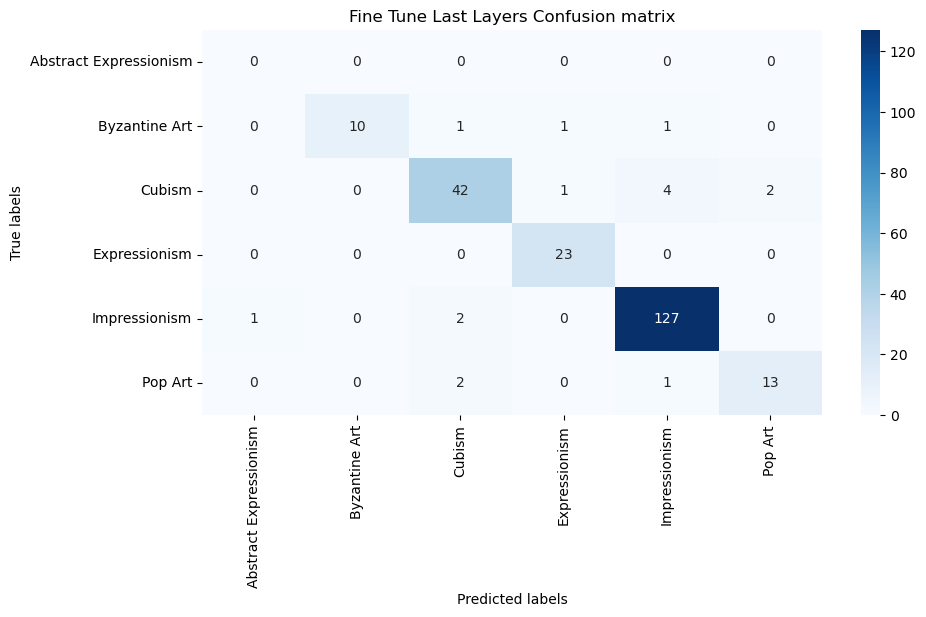

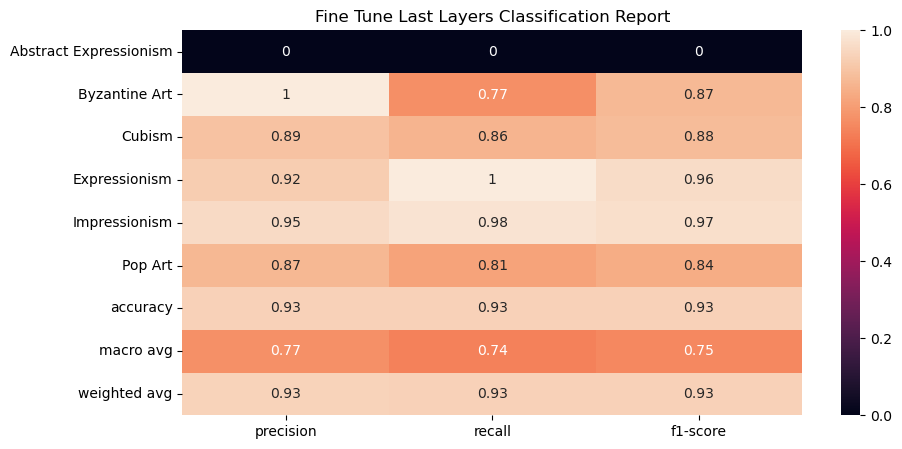

In [38]:
test_generator.reset()
r50flast_pred = transfer_model.predict(test_generator, verbose=1)
results = pred_results(train_generator, test_generator, r50flast_pred, 'r50finetune_last_model_results')
acc_rn50flast = metric_eval(test_generator, r50flast_pred, results, labels=os.listdir(train), title='Fine Tune Last Layers')

# RESULTS

In [40]:
# LOAD ALL MODEL RESULTS BY EPOCH
cnn_df = pd.read_csv('../results/cnn_hist_25epochs.csv')
cnnw_df = pd.read_csv('../results/weight_cnn_hist_25epochs.csv')
r50_df = pd.read_csv('../results/r50_hist_25epochs.csv')
r50w_df = pd.read_csv('../results/r50_weight_hist_25epochs.csv')
r50t_df = pd.read_csv('../results/r50_transfer_hist_25epochs.csv')
r50ls_df = pd.read_csv('../results/r50_finetune_last_hist_25epochs.csv')



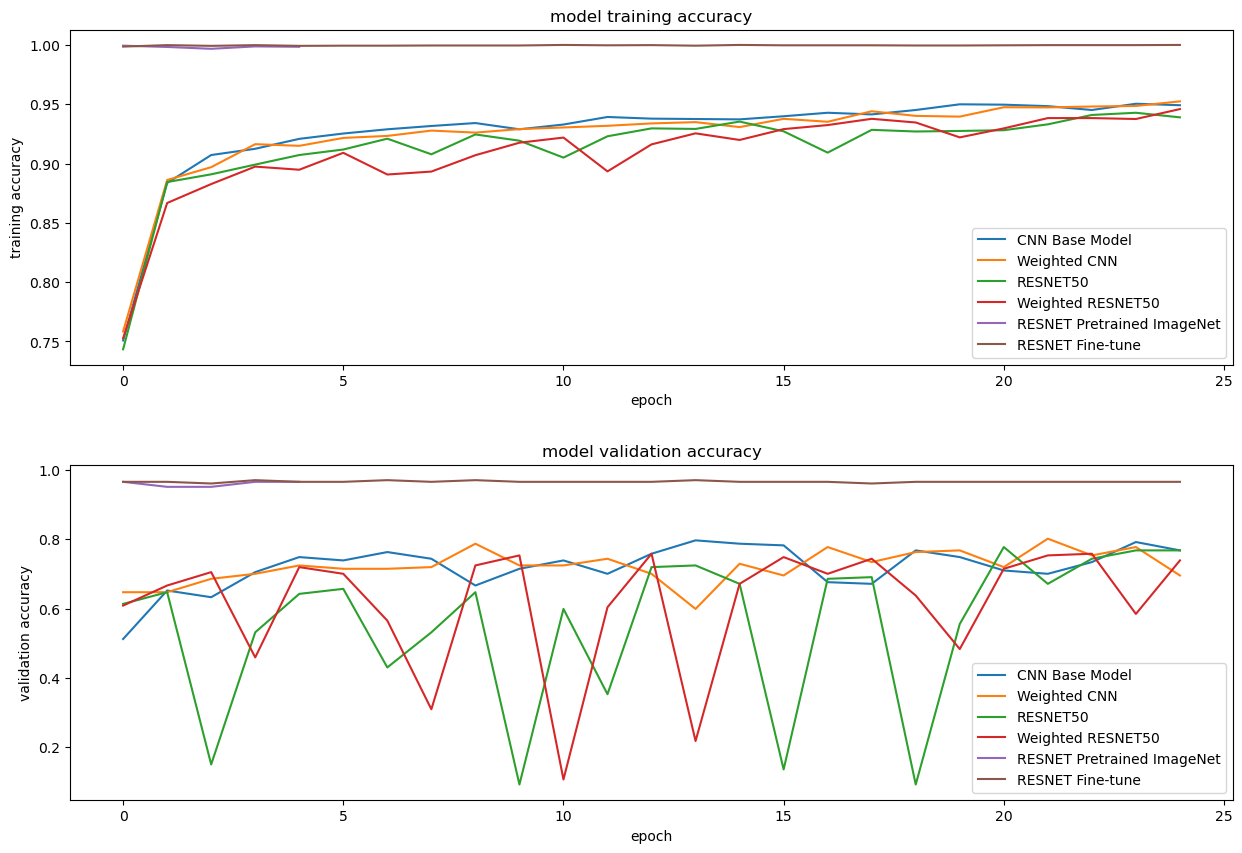

In [41]:
# PLOT AND COMPARE ACCURACY

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(cnn_df['accuracy'])
plt.plot(cnnw_df['accuracy'])
plt.plot(r50_df['accuracy'])
plt.plot(r50w_df['accuracy'])
plt.plot(r50t_df['accuracy'])
plt.plot(r50ls_df['accuracy'])
plt.title('model training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN Base Model', 'Weighted CNN', 'RESNET50', 'Weighted RESNET50', 'RESNET Pretrained ImageNet', 'RESNET Fine-tune'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(cnn_df['val_accuracy'])
plt.plot(cnnw_df['val_accuracy'])
plt.plot(r50_df['val_accuracy'])
plt.plot(r50w_df['val_accuracy'])
plt.plot(r50t_df['val_accuracy'])
plt.plot(r50ls_df['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN Base Model', 'Weighted CNN', 'RESNET50', 'Weighted RESNET50', 'RESNET Pretrained ImageNet', 'RESNET Fine-tune'], loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0.3)
plt.savefig(f'../img_metrics/train_val_accuracy.jpg', bbox_inches='tight')

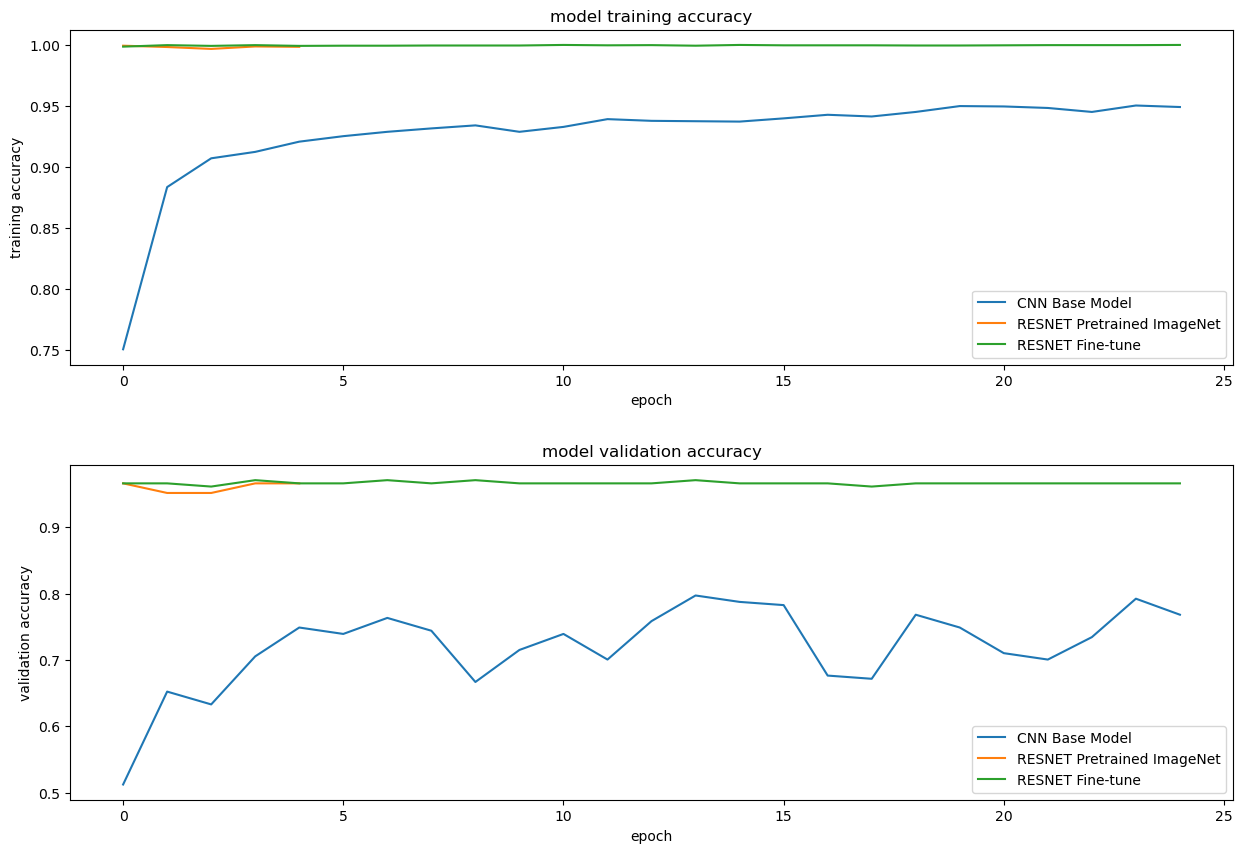

In [42]:
# PLOT AND COMPARE ACCURACY

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(cnn_df['accuracy'])
plt.plot(r50t_df['accuracy'])
plt.plot(r50ls_df['accuracy'])
plt.title('model training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN Base Model','RESNET Pretrained ImageNet', 'RESNET Fine-tune'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(cnn_df['val_accuracy'])
plt.plot(r50t_df['val_accuracy'])
plt.plot(r50ls_df['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN Base Model','RESNET Pretrained ImageNet', 'RESNET Fine-tune'], loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0.3)
plt.savefig(f'../img_metrics/train_val_accuracy_best.jpg', bbox_inches='tight')

In [45]:
import dataframe_image as dfi

In [68]:
accuracies = [acc_cnn, acc_cnnw, acc_rn50, acc_rn50w, acc_rn50t, acc_rn50flast]
acc_df = pd.concat(accuracies, axis=1)
acc_df.columns = ['CNN', 'CNN_weighted', 'ResNet50', 'ResNet50_Weighted', 'ResNet50_Pre-Trained', 'ResNet50_Fine_Tune']
dfi.export(acc_df, '../img_metrics/accuracy_df.jpg', table_conversion='chrome')

acc_df

CNN  CNN_weighted  ResNet50  ResNet50_Weighted  \
True_Label                                                           
Impressionism  0.830769      0.630769  0.815385           0.846154   
Pop Art        0.812500      0.500000  0.500000           0.500000   
Cubism         0.673469      0.714286  0.387755           0.408163   
Expressionism  0.391304      0.565217  0.565217           0.521739   
Byzantine Art  0.153846      0.076923  0.076923           0.230769   

               ResNet50_Pre-Trained  ResNet50_Fine_Tune  
True_Label                                               
Impressionism              0.815385            0.976923  
Pop Art                    0.500000            0.812500  
Cubism                     0.387755            0.857143  
Expressionism              0.565217            1.000000  
Byzantine Art              0.076923            0.769231

# BEST METRICS: PRE-TRAINED RESNET50 V. FINE-TUNED MODEL

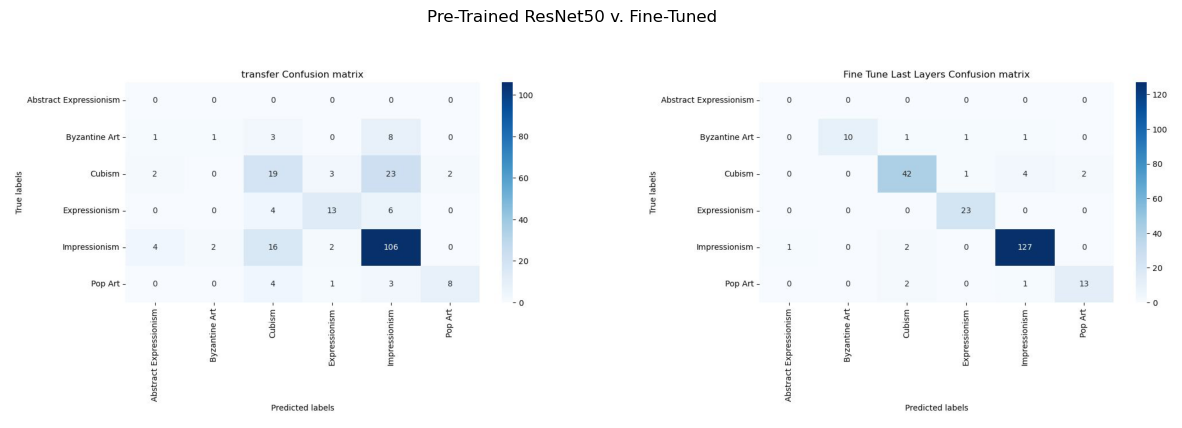

In [69]:
files = ['../img_metrics/transfer_confusion_matrix.jpg', 
         '../img_metrics/Fine Tune Last Layers_confusion_matrix.jpg']

plt.figure(figsize=(15,15))

for i in range(len(files)):
    ax = plt.subplot(1, 2, i + 1)
    image = plt.imread(files[i])
    plt.imshow(image)
    plt.suptitle('Pre-Trained ResNet50 v. Fine-Tuned', y=0.65)
    plt.axis('off')
plt.savefig(f'../img_metrics/metric_comparison1.jpg', bbox_inches='tight')
plt.show()

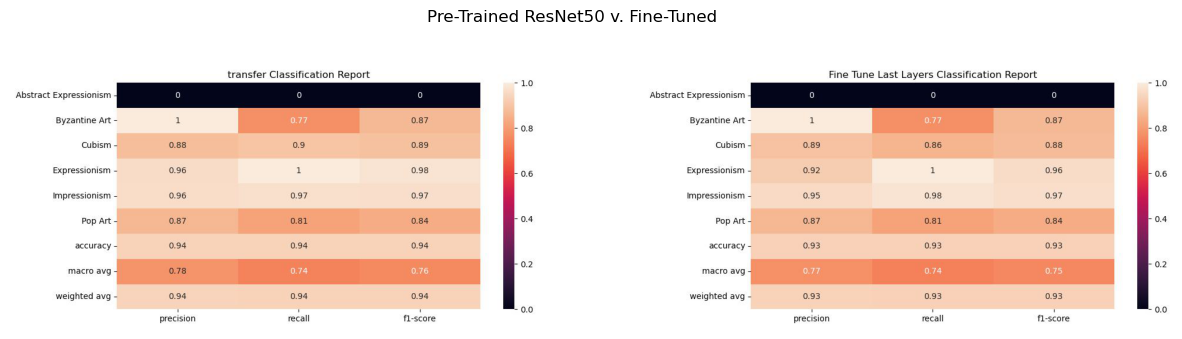

In [70]:
files = ['../img_metrics/transfer_classification_heatmap.jpg', 
         '../img_metrics/Fine Tune Last Layers_classification_heatmap.jpg']

plt.figure(figsize=(15,15))

for i in range(len(files)):
    ax = plt.subplot(1, 2, i + 1)
    image = plt.imread(files[i])
    plt.imshow(image)
    plt.suptitle('Pre-Trained ResNet50 v. Fine-Tuned', y=0.62)
    plt.axis('off')
plt.savefig(f'../img_metrics/metric_comparison2.jpg', bbox_inches='tight')
plt.show()

# Comparing Similar Painting Styles

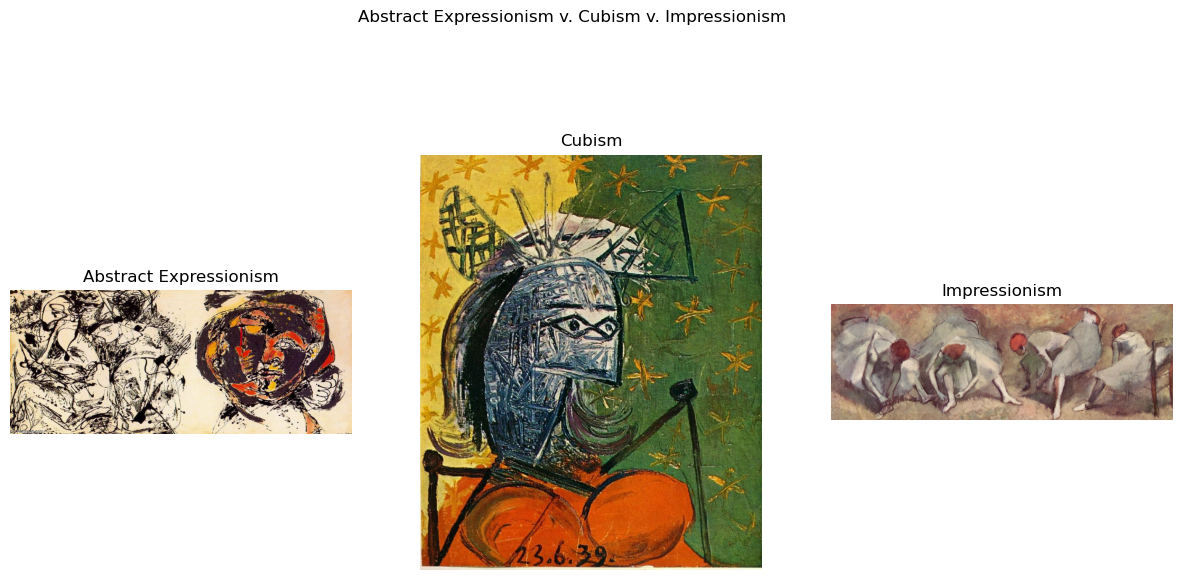

In [74]:
filepath = {'Abstract Expressionism':'../train_images/Abstract Expressionism/Jackson_Pollock_18.jpg',
           'Cubism':'../train_images/Cubism/Pablo_Picasso_435.jpg',
           'Impressionism':'../train_images/Impressionism/Edgar_Degas_108.jpg'}

plt.figure(figsize=(15,15))
i=0

for label, file in filepath.items():
    ax = plt.subplot(1, 3, i + 1)
    image = plt.imread(file)
    plt.title(label)
    plt.imshow(image)
    plt.suptitle('Abstract Expressionism v. Cubism v. Impressionism', y=0.73)
    plt.axis('off')
    i+=1
plt.savefig(f'../graphs/comparison1.jpg', bbox_inches='tight')
plt.show()

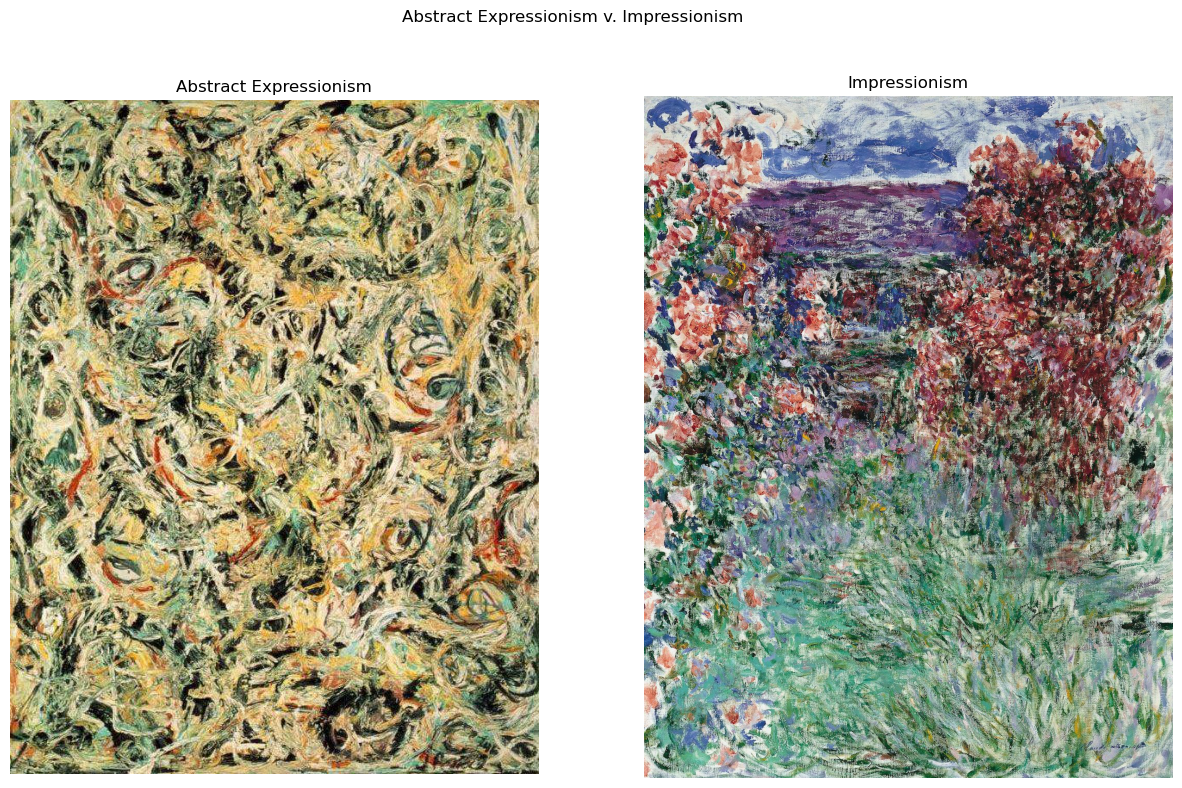

In [75]:
filepath = {'Abstract Expressionism':'../train_images/Abstract Expressionism/Jackson_Pollock_5.jpg',
            'Impressionism' :'../train_images/Impressionism/Claude_Monet_21.jpg'}

plt.figure(figsize=(15,15))
i=0

for label, file in filepath.items():
    ax = plt.subplot(1, 2, i + 1)
    image = plt.imread(file)
    plt.title(label)
    plt.imshow(image)
    plt.suptitle('Abstract Expressionism v. Impressionism', y=0.78)
    plt.axis('off')
    i+=1
plt.savefig(f'../graphs/comparison2.jpg', bbox_inches='tight')
plt.show()

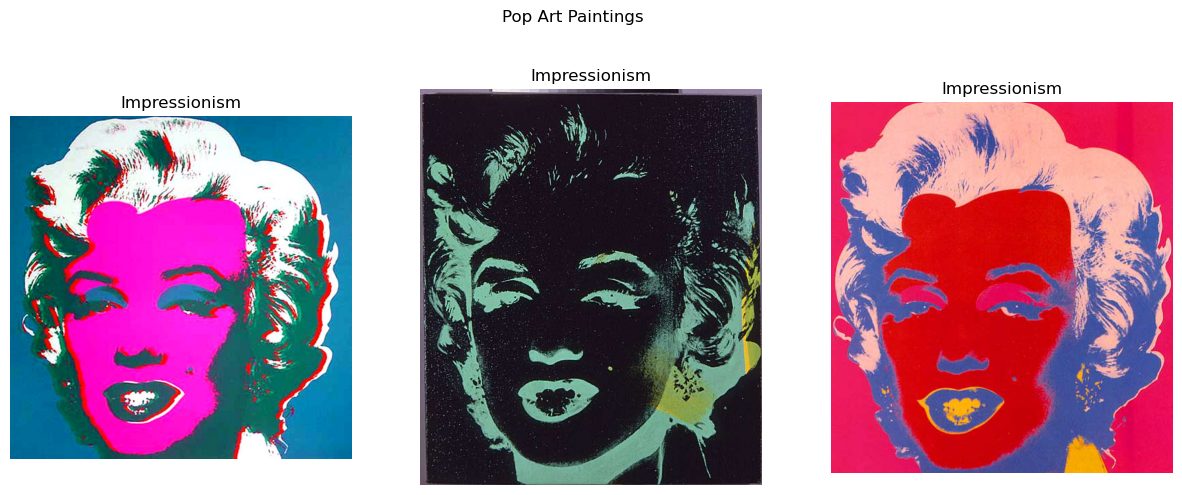

In [77]:
filepath = ['../train_images/Pop Art/Andy_Warhol_64.jpg',
'../train_images/Pop Art/Andy_Warhol_65.jpg',
'../train_images/Pop Art/Andy_Warhol_69.jpg']

plt.figure(figsize=(15,15))

for i in range(len(filepath)):
    ax = plt.subplot(1, 3, i + 1)
    image = plt.imread(filepath[i])
    plt.title(label)
    plt.imshow(image)
    plt.suptitle('Pop Art Paintings', y=0.68)
    plt.axis('off')
plt.savefig(f'../graphs/comparison3.jpg', bbox_inches='tight')
plt.show()